Code for plotting metanalysis data in Fig 1 
<br>
created RJ Burman April 2020
<br>
modified RJ Burman July 2020
<br>
modified RJ Burman May 2021
<br>
modified RJ Burman Aug 2021
<br>
modified RJ Burman Nov 2021 *uploaded onto GitHub
<br>
modified RJ Burman Jan 2022 *submission of revised manuscript

In [1]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import bzpR_Fig1 as bzpR

import importlib

Missing colon in file 'C:\\Users\\rburman.MSDITUN-TMV0GCR\\.matplotlib\\matplotlibrc', line 2 ('\x00')
Missing colon in file 'C:\\Users\\rburman.MSDITUN-TMV0GCR\\.matplotlib\\matplotlibrc', line 4 ('\x00')
Missing colon in file 'C:\\Users\\rburman.MSDITUN-TMV0GCR\\.matplotlib\\matplotlibrc', line 5 ('\x00')

Bad key ÿþp d f . f o n t t y p e  in file C:\Users\rburman.MSDITUN-TMV0GCR\.matplotlib\matplotlibrc, line 1 ('ÿþp\x00d\x00f\x00.\x00f\x00o\x00n\x00t\x00t\x00y\x00p\x00e\x00:\x00 \x004\x002\x00')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key  p d f . f o n t t y p e  in file C:\Users\rburman.MSDITUN-TMV0GCR\.matplotlib\matplotlibrc, line 3 ('\x00p\x00d\x00f\x00.\x00f\x00o\x00n\x00t\x00t\x00y\x00p\x00e\x00:\x00 \x004\x002\x00')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplot

Importing .csv file with data 

In [2]:
data = pd.read_csv(r'C:\Users\rburman.MSDITUN-TMV0GCR\OneDrive - Nexus365\Code\bzp_review\Fig 1\Burman_Fig1_data.csv')
data

,study,year,region,state,age,resistance,episodes,phase
0,Skinner et al,2010,HND,LMIC,adult,65,31,>60min
1,Burman et al,2019,SA,LMIC,paediatric,48,144,31-60min
2,Theusinger,2019,CHE,HIC,adult,28,126,10-30min
3,Theusinger,2019,CHE,HIC,paediatric,3,39,10-30min
4,Kay et al,2019,DEU,HIC,adult,43,42,31-60min
5,Hasan et al,2016,IND,LMIC,both,78,84,>60min
6,Navarro et al,2016,FRA,HIC,adult,16,68,>60min
7,Chamberlain et al,2014,USA,HIC,paediatric,15,273,unknown
8,Thakker et al,2013,IND,LMIC,paediatric,54,50,31-60min
9,Silbergleit et al,2012,USA,HIC,both,43,509,unknown


Counting the number of studies from high-income countries (HIC) and low-middle-income countires (LMIC)

In [3]:
no_of_studies = data['state'].value_counts()
print('HIC: ',no_of_studies[0], 'studies')
print('LMIC: ',no_of_studies[1], 'studies')

HIC:  18 studies
LMIC:  14 studies


Calculating the total number of SE studies across all studies

In [4]:
total_episodes = data['episodes'].sum()
print('SE episodes across all studies: ',total_episodes, 'episodes')

SE episodes across all studies:  4149 episodes


Generating data and related plots for Fig1A using custom function bzpR.fig1A

In [5]:
Fig1A, SuppFig1A, nonweighted_stats, weighted_stats = bzpR.fig1A(data)

Figure showing data across economic groups with mean +/- sem and comparative statistic reported

BZP-Resistant SE reported from HIC studies (mean ± sem) :  29.22 ± 4.33 %
BZP-Resistant SE reported from LMIC studies (mean ± sem) :  45.71 ± 5.97 %
BZP-Resistant SE reported from studies across economic groups (mean ± sem) :  36.44 ± 3.81 %

Statistic comparison between HIC vs LMIC (p-value):  0.03
Statistic test used:  unpaired t-test


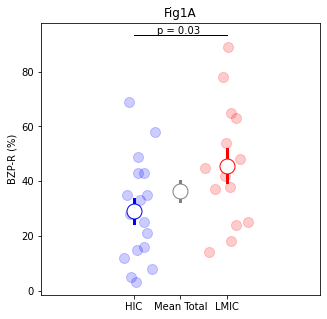

In [6]:
print('BZP-Resistant SE reported from HIC studies (mean \u00B1 sem) : ', np.round(nonweighted_stats['Mean HIC'],2), u"\u00B1", np.round(nonweighted_stats['SEM HIC'],2),'%')
print('BZP-Resistant SE reported from LMIC studies (mean \u00B1 sem) : ', np.round(nonweighted_stats['Mean LMIC'],2), u"\u00B1", np.round(nonweighted_stats['SEM LMIC'],2),'%')
print('BZP-Resistant SE reported from studies across economic groups (mean \u00B1 sem) : ', np.round(nonweighted_stats['Mean Total'],2), u"\u00B1", np.round(nonweighted_stats['SEM Total'],2),'%')
print()
p_value = nonweighted_stats['p-value']
print('Statistic comparison between HIC vs LMIC (p-value): ', np.round(p_value[1],2))
print('Statistic test used: ', nonweighted_stats['test'])

Fig1A

In [7]:
os.chdir(r'C:\Users\rburman.MSDITUN-TMV0GCR\OneDrive - Nexus365\Code\bzp_review\Fig 1')
Fig1A.savefig('Fig1A' + '.png', format='png')
Fig1A.savefig('Fig1A' + '.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Plot showing resistance reported across studies weighted by sample size and separated by age group of participants

BZP-Resistant SE reported from HIC studies weighted to sample size (weigh. mean ± sem) :  33.95 ± 0.31 %
BZP-Resistant SE reported from LMIC studies weighted to sample size (weigh. mean ± sem) :  42.55 ± 0.5 %
BZP-Resistant SE reported from studies across economic groups weighted to sample size (weigh. mean ± sem) :  37.22 ± 0.28 %

*SEM lines are plotted within weighted mean circles


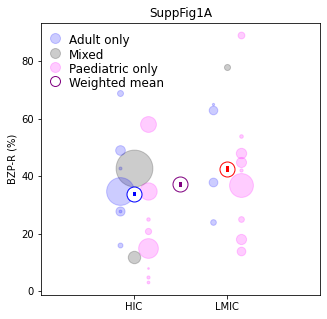

In [8]:
print('BZP-Resistant SE reported from HIC studies weighted to sample size (weigh. mean \u00B1 sem) : ', np.round(weighted_stats['Weighted Mean HIC'],2), u"\u00B1", np.round(weighted_stats['Weighted SEM HIC'],2),'%')
print('BZP-Resistant SE reported from LMIC studies weighted to sample size (weigh. mean \u00B1 sem) : ', np.round(weighted_stats['Weighted Mean LMIC'],2), u"\u00B1", np.round(weighted_stats['Weighted SEM LMIC'],2),'%')
print('BZP-Resistant SE reported from studies across economic groups weighted to sample size (weigh. mean \u00B1 sem) : ', np.round(weighted_stats['Weighted Mean Total'],2), u"\u00B1", np.round(weighted_stats['Weighted SEM Total'],2),'%')
print()
print('*SEM lines are plotted within weighted mean circles')
SuppFig1A


In [9]:
os.chdir(r'C:\Users\rburman.MSDITUN-TMV0GCR\OneDrive - Nexus365\Code\bzp_review\Fig 1')
SuppFig1A.savefig('SuppFig1A' + '.png', format='png')
SuppFig1A.savefig('SuppFig1A' + '.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Calculating metrics and plotting figures for data associating BZP-R (%) with SE duration
SE duration categorised as either <60min or >60min

Fig1B - revised figure demonstrating signifiant increase in BZP-R(%) with SE over 60min

In [10]:
Fig1B, nonweighted_stats_phases, weighted_stats_phases = bzpR.fig1B(data)

BZP resistance reported for SE duration <60min (mean ± sem) :  31.47 ± 4.51 %
BZP resistance reported for SE duration >60min (mean ± sem) :  49.18 ± 7.71 %

Statistic comparison between <60min vs >60min (p-value):  0.03
Statistic test used:  unpaired t-test


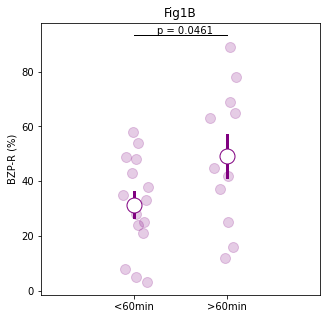

In [11]:
print('BZP resistance reported for SE duration <60min (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases['Mean <60min'],2), u"\u00B1", np.round(nonweighted_stats_phases['SEM <60min'],2),'%')
print('BZP resistance reported for SE duration >60min (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases['Mean >60min'],2), u"\u00B1", np.round(nonweighted_stats_phases['SEM >60min'],2),'%')
print()
p_value = nonweighted_stats['p-value']
print('Statistic comparison between <60min vs >60min (p-value): ', np.round(p_value[1],2))
print('Statistic test used: ', nonweighted_stats['test'])
Fig1B

Saving figures in output directory

In [12]:
os.chdir(r'C:\Users\rburman.MSDITUN-TMV0GCR\OneDrive - Nexus365\Code\bzp_review\Fig 1')
Fig1B.savefig('Fig1B' + '.png', format='png')
Fig1B.savefig('Fig1B' + '.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Supp Fig1B - Stratifying data in Fig1B across different economic groups

In [13]:
importlib.reload(bzpR)
nonweighted_stats_phases_eco, weighted_stats_phases_eco, cont_table, cont_stats, perc_table, Fig1C, SuppFig1B, SuppFig1C = bzpR.suppfigs(data, p_value, weighted_stats_phases )

Data from studies produced by High-income (HIC) and low-middle-income (LMIC) countries: 

For HIC:
BZP resistance reported for SE duration 10-30min duration (mean ± sem) :  12.0 ± 8.02 %
BZP resistance reported for SE duration 31-60min duration (mean ± sem) :  34.0 ± 5.69 %
BZP resistance reported for SE duration <60min duration (mean ± sem) :  28.0 ± 5.44 %
BZP resistance reported for SE duration >60min duration (mean ± sem) :  32.33 ± 18.37 %
Statistic comparison between <60min vs >60min (p-value) in lmic:  0.18
Statistic test used:  unpaired t-test

For LMIC:
BZP resistance reported for SE duration 10-30min duration (mean ± sem) :  24.0 ± nan %
BZP resistance reported for SE duration 31-60min duration (mean ± sem) :  46.67 ± 4.67 %
BZP resistance reported for SE duration <60min duration (mean ± sem) :  41.0 ± 6.56 %
BZP resistance reported for SE duration >60min duration (mean ± sem) :  55.5 ± 7.72 %
Statistic comparison between <60min vs >60min (p-value) in lmic:  0.26
Statistic test used:  unpaired t-test


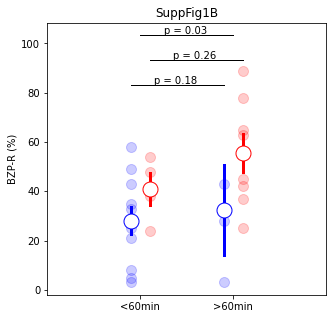

In [14]:
print('For HIC:') 
print('BZP resistance reported for SE duration 10-30min duration (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases_eco['HIC Mean 10-30min'],2), u"\u00B1", np.round(nonweighted_stats_phases_eco['HIC SEM 10-30min'],2),'%')
print('BZP resistance reported for SE duration 31-60min duration (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases_eco['HIC Mean 31-60min'],2), u"\u00B1", np.round(nonweighted_stats_phases_eco['HIC SEM 31-60min'],2),'%')
print('BZP resistance reported for SE duration <60min duration (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases_eco['HIC Mean <60min'],2), u"\u00B1", np.round(nonweighted_stats_phases_eco['HIC SEM <60min'],2),'%')
print('BZP resistance reported for SE duration >60min duration (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases_eco['HIC Mean >60min'],2), u"\u00B1", np.round(nonweighted_stats_phases_eco['HIC SEM >60min'],2),'%')

p_value_hic = nonweighted_stats_phases_eco['p-value HIC']
p_value_hic = p_value_hic[1]
print('Statistic comparison between <60min vs >60min (p-value) in lmic: ',np.round(p_value_hic,2),)
print('Statistic test used: ', nonweighted_stats_phases_eco['test HIC'])

print()

print('For LMIC:') 
print('BZP resistance reported for SE duration 10-30min duration (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases_eco['LMIC Mean 10-30min'],2), u"\u00B1", np.round(nonweighted_stats_phases_eco['LMIC SEM 10-30min'],2),'%')
print('BZP resistance reported for SE duration 31-60min duration (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases_eco['LMIC Mean 31-60min'],2), u"\u00B1", np.round(nonweighted_stats_phases_eco['LMIC SEM 31-60min'],2),'%')
print('BZP resistance reported for SE duration <60min duration (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases_eco['LMIC Mean <60min'],2), u"\u00B1", np.round(nonweighted_stats_phases_eco['LMIC SEM <60min'],2),'%')
print('BZP resistance reported for SE duration >60min duration (mean \u00B1 sem) : ', np.round(nonweighted_stats_phases_eco['LMIC Mean >60min'],2), u"\u00B1", np.round(nonweighted_stats_phases_eco['LMIC SEM >60min'],2),'%')

p_value_lmic = nonweighted_stats_phases_eco['p-value LMIC']
p_value_lmic = p_value_lmic[1]
print('Statistic comparison between <60min vs >60min (p-value) in lmic: ',np.round(p_value_lmic,2),)
print('Statistic test used: ', nonweighted_stats_phases_eco['test LMIC'])

SuppFig1B

In [15]:
SuppFig1B.savefig('SuppFig1B' + '.png', format='png')
SuppFig1B.savefig('SuppFig1B' + '.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Contingency table showing association between duration of SE reported and economic area in which study performed

In [16]:
p_value = cont_stats['p-value']
OR = np.round(cont_stats['OR'],2)

print(cont_table)
print('p-value (Fisher-Exact Test): ','{:f}'.format(p_value))
print('Odds Ratio: ', OR)
print(perc_table)

╒══════╤═════════════╤═════════════╕
│      │   SE <60min │   SE >60min │
╞══════╪═════════════╪═════════════╡
│ HIC  │          11 │           3 │
├──────┼─────────────┼─────────────┤
│ LMIC │           4 │           8 │
╘══════╧═════════════╧═════════════╛
p-value (Fisher-Exact Test):  0.044737
Odds Ratio:  7.33
╒══════╤═════════════╤═════════════╕
│      │ SE <60min   │ SE >60min   │
╞══════╪═════════════╪═════════════╡
│ HIC  │ 78.57%      │ 21.43%      │
├──────┼─────────────┼─────────────┤
│ LMIC │ 33.33%      │ 66.67%      │
╘══════╧═════════════╧═════════════╛


Iterpretation: Studis reporting SE duration >60min prior to BZP treatment are more likely to come from LMIC compared to HIC

Plotting difference in number of SE duration across economic groups

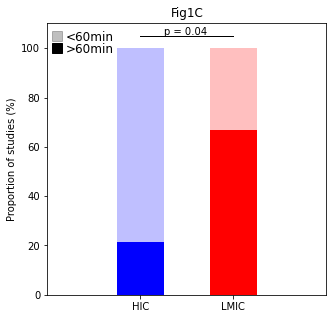

In [17]:
Fig1C

In [18]:
Fig1C.savefig('Fig1C' + '.png', format='png')
Fig1C.savefig('Fig1C' + '.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Full plot showing BZP-R(%) across different phases of SE and stratified across age, study size and economic group

Weighted mean BZP-R(%) reported for 10-30min SE duration (mean ± sem) 20.0 ± 0.61 %
Weighted mean BZP-R(%) reported for 31-60min SE duration (mean ± sem) 41.97 ± 0.36 %
Weighted mean BZP-R(%) reported for >60min SE duration (mean ± sem) 44.71 ± 0.66 %


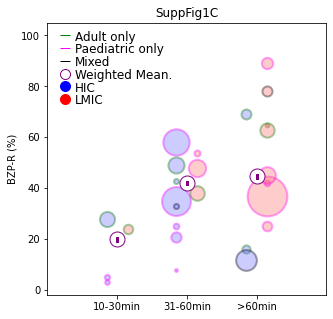

In [19]:
print('Weighted mean BZP-R(%) reported for 10-30min SE duration (mean \u00B1 sem)', np.round(weighted_stats_phases['Weighted Mean 10-30min'],2), u"\u00B1", np.round(weighted_stats_phases['Weighted SEM 10-30min'],2),'%')
print('Weighted mean BZP-R(%) reported for 31-60min SE duration (mean \u00B1 sem)', np.round(weighted_stats_phases ['Weighted Mean 31-60min'],2), u"\u00B1", np.round(weighted_stats_phases['Weighted SEM 31-60min'],2),'%')
print('Weighted mean BZP-R(%) reported for >60min SE duration (mean \u00B1 sem)', np.round(weighted_stats_phases ['Weighted Mean >60min'],2), u"\u00B1", np.round(weighted_stats_phases['Weighted SEM >60min'],2),'%')

SuppFig1C

In [20]:
SuppFig1C.savefig('SuppFig1D' + '.png', format='png')
SuppFig1C.savefig('SuppFig1C' + '.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
